In [1]:
import pandas as pd

Leggiamo il dataset relativo al Titanic, e mostriamone le prime cinque righe.

In [2]:
titanic = pd.read_csv('../../data/titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Estraiamo la serie contenente tutti i nomi dei passeggeri.

In [3]:
names = titanic['Name']
names.head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

Facciamo in modo che l'indice del dataset diventi la colonna `Ticket`, e mostriamo a schermo il nome del passeggero il cui biglietto è pari a **STON/02. 3101282**.

In [4]:
titanic.set_index('Ticket', inplace=True)
titanic.loc['STON/O2. 3101282', 'Name']

'Heikkinen, Miss. Laina'

Possiamo anche accedere in scrittura ad un attributo. In questo caso, usiamo `loc()`, ma per farlo possiamo usare anche `iloc()`:

In [5]:
titanic.loc['STON/O2. 3101282', 'Name'] = 'Pippo'

Possiamo anche accedere all'interno dato mediante la funzione `loc()`:

In [6]:
titanic.loc['STON/O2. 3101282', :]      # Lo slicing può essere omesso

PassengerId         3
Survived            1
Pclass              3
Name            Pippo
Sex            female
Age              26.0
SibSp               0
Parch               0
Fare            7.925
Cabin             NaN
Embarked            S
Name: STON/O2. 3101282, dtype: object

Proviamo ad accedere a classe e nome dei passeggeri che vanno dal terzo al quinto.

In [7]:
print(titanic.iloc[2:5, 2:4])

                  Pclass                                          Name
Ticket                                                                
STON/O2. 3101282       3                                         Pippo
113803                 1  Futrelle, Mrs. Jacques Heath (Lily May Peel)
373450                 3                      Allen, Mr. William Henry


Vediamo come aggiungere una nuova colonna ad un dataframe. In particolare, creiamo un dataframe fatto da un'unica colonna di numeri interi, ed aggiungiamovene un'altra pari esattamente al doppio della prima.

In [8]:
df = pd.DataFrame([1,2,3,4,5], columns=['one'])     
df['two'] = df['one'] * 2
df

,one,two
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10


La stessa operazione può essere effettuata con il metodo `concat()`, che accetta, tra i vari parametri, la lista dei dataframe da concatenare e l'asse sul quale effettuare l'operazione. In particolare, proviamo ad effettuarla aggiungendo prima una colonna:

In [9]:
df_three_vals = df['one'] * 3
df_three = pd.DataFrame(df_three_vals.values, columns=['three'])
df_new_col = pd.concat([df, df_three], axis=1)
df_new_col

,one,two,three
0,1,2,3
1,2,4,6
2,3,6,9
3,4,8,12
4,5,10,15


e poi una riga:

In [10]:
df_add = pd.DataFrame([[6, 12, 18]], columns=['one', 'two', 'three']) 

df_last = pd.concat([df_new_col, df_add])
df_last.reset_index(inplace=True)
df_last.drop(['index'], axis=1, inplace=True)
df_last

,one,two,three
0,1,2,3
1,2,4,6
2,3,6,9
3,4,8,12
4,5,10,15
5,6,12,18


Proviamo adesso a selezionare un insieme di dati basandoci su delle regole.

In [11]:
men = titanic[(titanic['Age'] > 18) & (titanic['Sex'] == 'male')]
print(men.head())

           PassengerId  Survived  Pclass                            Name  \
Ticket                                                                     
A/5 21171            1         0       3         Braund, Mr. Owen Harris   
373450               5         0       3        Allen, Mr. William Henry   
17463                7         0       1         McCarthy, Mr. Timothy J   
A/5. 2151           13         0       3  Saundercock, Mr. William Henry   
347082              14         0       3     Andersson, Mr. Anders Johan   

            Sex   Age  SibSp  Parch     Fare Cabin Embarked  
Ticket                                                       
A/5 21171  male  22.0      1      0   7.2500   NaN        S  
373450     male  35.0      0      0   8.0500   NaN        S  
17463      male  54.0      0      0  51.8625   E46        S  
A/5. 2151  male  20.0      0      0   8.0500   NaN        S  
347082     male  39.0      1      5  31.2750   NaN        S  


Usiamo la funzione `describe()` per descrivere il dataset.

In [12]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Visualizziamo in ultimo a schermo due istogrammi che descrivano l'età ed il sesso dei passeggeri.

<AxesSubplot:>

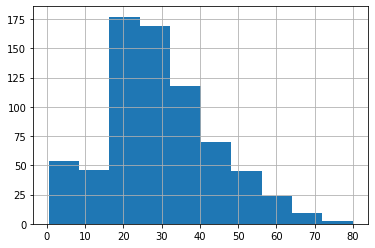

In [13]:
titanic['Age'].hist()

<AxesSubplot:>

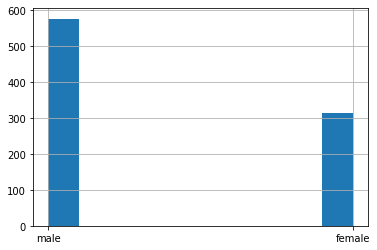

In [14]:
titanic['Sex'].hist()